In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#We will use the airlines data
airlines = pd.read_csv('/Users/shikharghimire/Desktop/TimeSeries-Practice/data/airline_passengers.csv',index_col = 'Month',parse_dates=True)

#We have to convert month into index as currently it's just a string

In [8]:
airlines.dropna(inplace=True)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
airlines.index = pd.to_datetime(airlines.index) #Converting index into datetime as it is datetime object

In [14]:
airlines.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [18]:
#RECAP : Let's see how we can create a simple moving average first
airlines['6-month-SMA'] = airlines['Thousands of Passengers'].rolling(window = 6).mean() #6 month simple moving average since the date is in months
#Extracting the mean

In [19]:
#RECAP : Let's see how we can create a simple moving average first
airlines['12-month-SMA'] = airlines['Thousands of Passengers'].rolling(window = 12).mean() #6 month simple moving average since the date is in months
#Extracting the mean

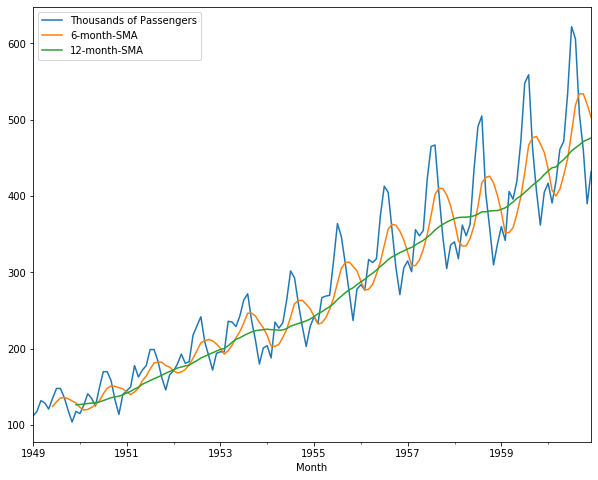

In [22]:
airlines.plot(figsize=(10,8))

In [24]:
#There is a lag or no data at first(check. on the graph)
#With sma, we can also never reach the peak here and so what we wanna do with EWMA is let these more recent points have more
#weight than the past points


In [25]:
airlines['EWMA-12'] = airlines['Thousands of Passengers'].ewm(span = 12).mean()

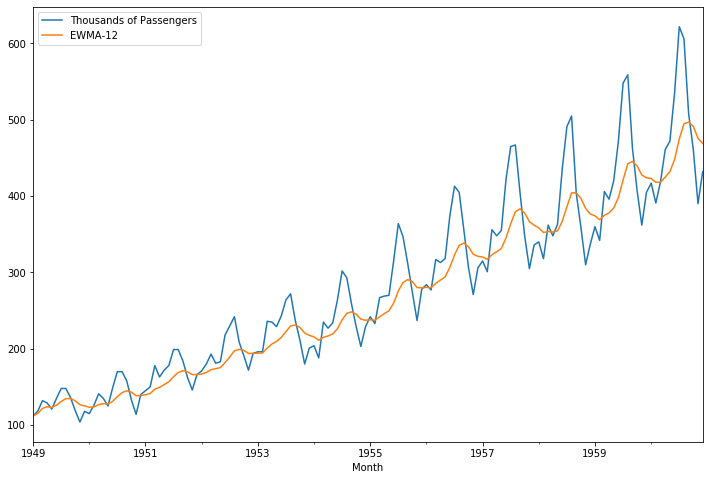

In [29]:
airlines[['Thousands of Passengers','EWMA-12']].plot(figsize=(12,8))
#Notice that the behaviour in the beggining is different than the behaviour in the end
#Seasonality trends is alot more clear in the end points than the beginning points.
#Because we weighted the points closer to the present time heavier than the more historical values